In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('notebook', {'NotebookApp': {'iopub_data_rate_limit': 10000000}})


{'NotebookApp': {'iopub_data_rate_limit': 10000000}}

In [ ]:
# Check for GPU
import torch
print(torch.cuda.is_available())

True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Setup and Data Preparation

In [ ]:
!pip install tensorflow numpy matplotlib

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import normalize

In [ ]:
# Define paths
base_path = '/path/to/dataset' # your path to the dataset

train_image_path = os.path.join(base_path, 'train/images')
train_mask_path = os.path.join(base_path, 'train/masks')
val_image_path = os.path.join(base_path, 'val/images')
val_mask_path = os.path.join(base_path, 'val/masks')
test_image_path = os.path.join(base_path, 'test/images')
test_mask_path = os.path.join(base_path, 'test/masks')

In [ ]:
# Function to list files in a directory
def list_files(directory):
    return os.listdir(directory)

# Check contents of the directories
print("Train Image Directory Contents:", list_files(train_image_path))
print("Train Mask Directory Contents:", list_files(train_mask_path))


Train Image Directory Contents: ['25658_1_generated_0_00001_.png', '43100_1_generated_0_00001_.png', '40196_0_generated_0_00001_.png', '41351_0_generated_0_00001_.png', '54512_1_generated_0_00001_.png', '25735_0_generated_1_00001_.png', '15737_0_generated_0_00001_.png', '35298_1_generated_0_00001_.png', '48981_0_generated_1_00001_.png', '22617_0_generated_0_00001_.png', '33347_1_generated_0_00001_.png', '44440_0_generated_1_00001_.png', '39547_1_generated_1_00001_.png', '40164_0_generated_0_00001_.png', '25530_0_generated_0_00001_.png', '16869_1_generated_1_00001_.png', '30163_1_generated_0_00001_.png', '45345_1_generated_0_00001_.png', '34602_0_generated_1_00001_.png', '24748_1_generated_0_00001_.png', '29811_1_generated_1_00001_.png', '34627_3_generated_0_00001_.png', '47103_1_generated_0_00001_.png', '51015_0_generated_0_00001_.png', '27672_1_generated_0_00001_.png', '34358_0_generated_0_00001_.png', '18829_0_generated_0_00001_.png', '34567_0_generated_0_00001_.png', '39860_0_genera

In [ ]:
print("Train Image Directory Contents:", len(list_files(train_image_path)))
print("Train Mask Directory Contents:", len(list_files(train_mask_path)))

print("Val Image Directory Contents:", len(list_files(val_image_path)))
print("Val Mask Directory Contents:", len(list_files(val_mask_path)))

print("Test Image Directory Contents:", len(list_files(test_image_path)))
print("Test Mask Directory Contents:", len(list_files(test_mask_path)))

Train Image Directory Contents: 1992
Train Mask Directory Contents: 1992
Val Image Directory Contents: 489
Val Mask Directory Contents: 489
Test Image Directory Contents: 10
Test Mask Directory Contents: 10


In [ ]:
# Define the load_data function
def load_data(image_path, mask_path):
    images = []
    masks = []
    image_files = os.listdir(image_path)
    mask_files = os.listdir(mask_path)

    for image_file in image_files:
        # Extract the first 5 digits from the image file name
        number = image_file[:5]
        # Find the corresponding mask file by matching the first 5 digits
        mask_file = next((m for m in mask_files if m.startswith(number)), None)
        if mask_file:
            img_path = os.path.join(image_path, image_file)
            mask_full_path = os.path.join(mask_path, mask_file)
            if os.path.exists(img_path) and os.path.exists(mask_full_path):
                img = load_img(img_path)
                img_array = img_to_array(img)
                mask = load_img(mask_full_path, color_mode='grayscale')
                mask_array = img_to_array(mask)
                images.append(img_array)
                masks.append(mask_array)
            else:
                print(f"File not found: {img_path} or {mask_full_path}")
        else:
            print(f"No corresponding mask found for: {image_file}")

    return np.array(images), np.array(masks)


Load data

In [ ]:
train_images, train_masks = load_data(train_image_path, train_mask_path)

In [ ]:
val_images, val_masks = load_data(val_image_path, val_mask_path)

In [ ]:
test_images, test_masks = load_data(test_image_path, test_mask_path)

Save the data using numpy

In [ ]:
# Save the data using numpy for future use
np.save(os.path.join(base_path, 'train_images.npy'), train_images)
np.save(os.path.join(base_path, 'train_masks.npy'), train_masks)
np.save(os.path.join(base_path, 'val_images.npy'), val_images)
np.save(os.path.join(base_path, 'val_masks.npy'), val_masks)
np.save(os.path.join(base_path, 'test_images.npy'), test_images)
np.save(os.path.join(base_path, 'test_masks.npy'), test_masks)

In [ ]:
# Check the shapes of loaded data
print(f"Train images shape: {train_images.shape}, Train masks shape: {train_masks.shape}")
print(f"Validation images shape: {val_images.shape}, Validation masks shape: {val_masks.shape}")
print(f"Test images shape: {test_images.shape}, Test masks shape: {test_masks.shape}")


Train images shape: (1992, 512, 512, 3), Train masks shape: (1992, 512, 512, 1)
Validation images shape: (489, 512, 512, 3), Validation masks shape: (489, 512, 512, 1)
Test images shape: (10, 512, 512, 3), Test masks shape: (10, 512, 512, 1)


Load saved data

In [ ]:
# # Define paths
# load_path = '/content/sample_data' #  the path to the saved required files

# # Load the saved data
# train_images = np.load(os.path.join(load_path, 'train_images.npy'))
# train_masks = np.load(os.path.join(load_path, 'train_masks.npy'))
# val_images = np.load(os.path.join(load_path, 'val_images.npy'))
# val_masks = np.load(os.path.join(load_path, 'val_masks.npy'))
# test_images = np.load(os.path.join(load_path, 'test_images.npy'))
# test_masks = np.load(os.path.join(load_path, 'test_masks.npy'))

# # Check the shapes of loaded data
# print(f"Train images shape: {train_images.shape}, Train masks shape: {train_masks.shape}")
# print(f"Validation images shape: {val_images.shape}, Validation masks shape: {val_masks.shape}")
# print(f"Test images shape: {test_images.shape}, Test masks shape: {test_masks.shape}")


## 2. Model Architecture Selection

U-Net architecture, which is a popular choice for image segmentation tasks.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    return model

In [ ]:
# Function to resize images and masks
def preprocess(image, mask, target_size=(256, 256)):
    image = tf.image.resize(image, target_size)
    mask = tf.image.resize(mask, target_size)
    return image, mask

In [ ]:

# Apply the preprocessing function to the datasets
train_images_resized = tf.data.Dataset.from_tensor_slices((train_images, train_masks))
train_images_resized = train_images_resized.map(lambda image, mask: preprocess(image, mask))

val_images_resized = tf.data.Dataset.from_tensor_slices((val_images, val_masks))
val_images_resized = val_images_resized.map(lambda image, mask: preprocess(image, mask))

# Batch the datasets
train_images_resized = train_images_resized.batch(16)
val_images_resized = val_images_resized.batch(16)

In [ ]:
model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

## 3. Training the Model

In [ ]:
# Train the model
history = model.fit(
    train_images_resized,
    epochs=3,
    validation_data=val_images_resized,
    verbose=1
)

Epoch 1/3
125/125 [==============================] - 1076s 9s/step - loss: nan - accuracy: 0.8460 - val_loss: nan - val_accuracy: 0.9630
Epoch 2/3
125/125 [==============================] - 1066s 9s/step - loss: nan - accuracy: 0.9622 - val_loss: nan - val_accuracy: 0.9630
Epoch 3/3
125/125 [==============================] - 1066s 9s/step - loss: nan - accuracy: 0.9622 - val_loss: nan - val_accuracy: 0.9630


In [ ]:
model.save('/content/sample_data/eyeglasses_segmentation_model.h5')

## 4. Evaluating the Model

In [ ]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_masks)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.9686
Test Loss: nan
Test Accuracy: 0.9686138033866882


## 5. Output of graphs

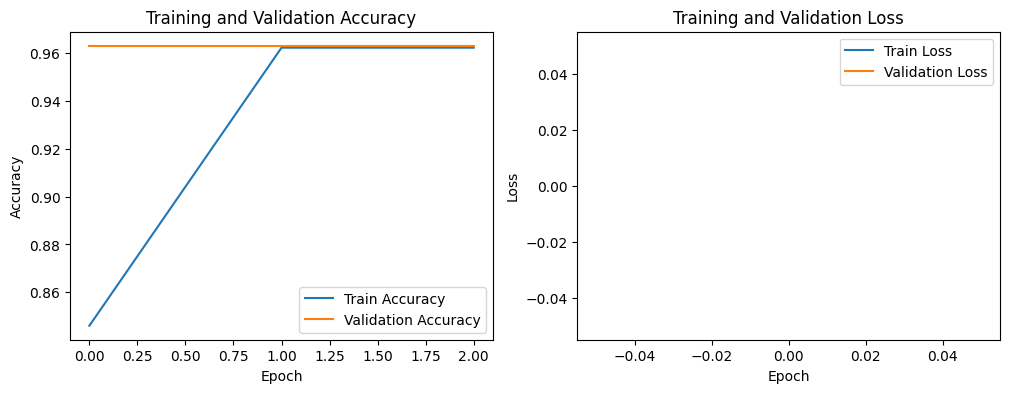

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 6. Inference and Visualization

1/1 [==============================] - 1s 652ms/step


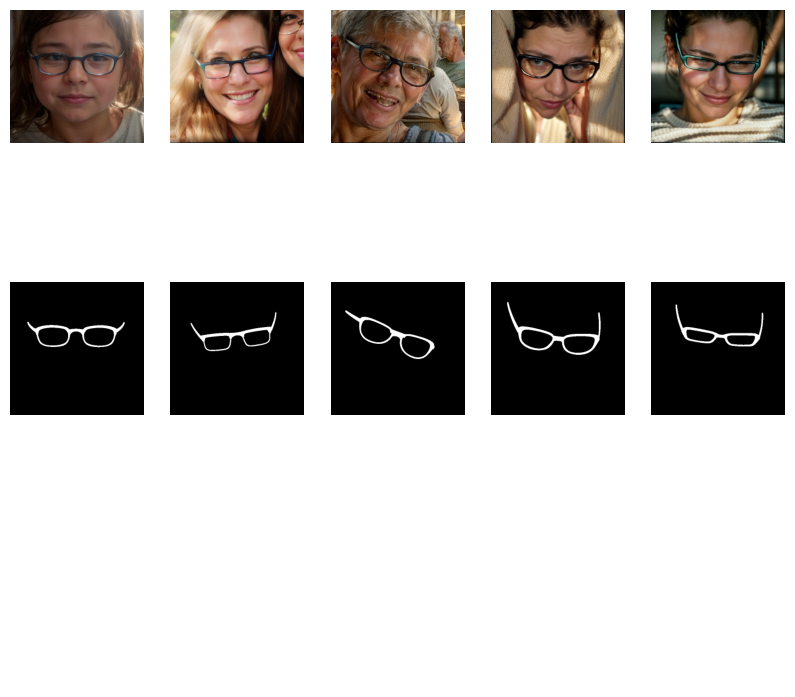

In [ ]:
# Resize test images and masks using the same preprocessing function
resized_test_images, resized_test_masks = preprocess(test_images, test_masks)

# Function to visualize predictions
def visualize_predictions(images, masks, model):
    predictions = model.predict(images)
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, len(images), i + 1)
        plt.imshow(images[i].numpy().astype(np.uint8))
        plt.axis('off')
        plt.subplot(3, len(images), len(images) + i + 1)
        plt.imshow(masks[i].numpy().squeeze(), cmap='gray')
        plt.axis('off')
        plt.subplot(3, len(images), 2*len(images) + i + 1)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

# Display results on a few test images
visualize_predictions(resized_test_images[:5], resized_test_masks[:5], model)

## 7. Eyeglasses Segmentation Model Report

## Introduction
The objective of this project is to develop and train a deep learning model to accurately segment eyeglasses in facial images.

## Dataset
Overview

The dataset used for the eyeglasses segmentation task comprises facial images annotated with corresponding masks that delineate the eyeglasses regions. The dataset is organized into three main folders: training, validation, and test, each containing subfolders for images and masks.
Structure

The eyeglasses_dataset is structured as follows:

    Training Data:
        train/images/: Contains the facial images used for training the model.
        train/masks/: Contains the binary masks corresponding to the eyeglasses regions in the training images.

    Validation Data:
        val/images/: Contains the facial images used for validating the model during training.
        val/masks/: Contains the binary masks corresponding to the eyeglasses regions in the validation images.

    Test Data:
        test/images/: Contains the facial images used for testing the model after training.
        test/masks/: Contains the binary masks corresponding to the eyeglasses regions in the test images.

Details

    Images: The images are in standard RGB format and vary in resolution. For consistency and to match the input size required by the model, all images are resized to 256x256 pixels during preprocessing.
    Masks: The masks are binary images where pixels belonging to the eyeglasses region are marked with 1 (or 255 in 8-bit grayscale images), and all other pixels are marked with 0. The masks are also resized to 256x256 pixels during preprocessing to ensure alignment with the resized images.

Data Preprocessing

To prepare the dataset for training, validation, and testing, the following preprocessing steps are applied:

    Resizing: Both images and masks are resized to 256x256 pixels.
    Normalization: Image pixel values are normalized to the range [0, 1] by dividing by 255. This helps in faster convergence during training.
    Tensor Conversion: Images and masks are converted to TensorFlow tensors to leverage GPU acceleration for model training.

Conclusion

The dataset is well-structured and annotated, providing a solid foundation for training a deep learning model for eyeglasses segmentation. Proper preprocessing ensures that the data is in the correct format and size for the U-Net model, facilitating effective training and accurate segmentation results.

## Model Architecture
Overview

The U-Net architecture is a convolutional neural network (CNN) designed primarily for biomedical image segmentation.

Architecture Details

The U-Net model is characterized by its symmetric, U-shaped structure, which consists of two main parts: the encoder (contracting path) and the decoder (expanding path).
Encoder (Contracting Path)

The encoder part of the U-Net captures context in the input image by progressively down-sampling it through a series of convolutional and max-pooling layers. Each level of the encoder contains:

    Two convolutional layers with 3x3 filters, each followed by a ReLU activation function.
    A max-pooling layer with a 2x2 filter and a stride of 2 for down-sampling.

As the network goes deeper, the number of feature channels doubles after each down-sampling step, starting from 64 channels at the first level and increasing to 1024 channels at the bottleneck.
Decoder (Expanding Path)

The decoder part reconstructs the image back to its original resolution by progressively up-sampling the features through a series of up-convolutional (transposed convolutional) layers. Each level of the decoder contains:

    An up-convolutional layer (2x2 transposed convolution) that halves the number of feature channels.
    A concatenation with the corresponding feature map from the encoder (skip connection).
    Two convolutional layers with 3x3 filters, each followed by a ReLU activation function.

The skip connections from the encoder to the decoder provide local information to the global information obtained by the down-sampling path, which helps in precise localization.
Output Layer

The final layer of the U-Net is a 1x1 convolutional layer with a sigmoid activation function that maps the features to the desired output segmentation map. The output is a single-channel image (in the case of binary segmentation) where each pixel value represents the probability of belonging to the target class (eyeglasses in our case).
Model Summary

Here's a summary of the U-Net model architecture implemented in our project:

    Input Layer: Accepts an image of shape (256, 256, 3).
    Encoder:
        Level 1: Two 3x3 convolutions (64 filters), max-pooling.
        Level 2: Two 3x3 convolutions (128 filters), max-pooling.
        Level 3: Two 3x3 convolutions (256 filters), max-pooling.
        Level 4: Two 3x3 convolutions (512 filters), max-pooling.
        Level 5: Two 3x3 convolutions (1024 filters).
    Decoder:
        Level 4: Up-convolution (512 filters), concatenate with encoder level 4, two 3x3 convolutions (512 filters).
        Level 3: Up-convolution (256 filters), concatenate with encoder level 3, two 3x3 convolutions (256 filters).
        Level 2: Up-convolution (128 filters), concatenate with encoder level 2, two 3x3 convolutions (128 filters).
        Level 1: Up-convolution (64 filters), concatenate with encoder level 1, two 3x3 convolutions (64 filters).
    Output Layer: 1x1 convolution with a sigmoid activation function.

The U-Net model is trained using the Adam optimizer with a binary cross-entropy loss function, and accuracy is used as the evaluation metric.
Benefits of U-Net

    Precise Localization: The skip connections provide fine-grained details from the encoder to the decoder, enabling precise localization of the segmented regions.
    Efficient Training: The symmetric architecture allows for efficient gradient flow during training.
    Versatility: U-Net has been successfully applied to a wide range of image segmentation tasks beyond biomedical imaging.

By using U-Net for the eyeglasses segmentation task, we leverage its strengths to achieve accurate and efficient segmentation results.


## Training Configuration
- Optimizer: Adam
- Loss Function: Binary Crossentropy
- Metrics: Accuracy
- Epochs: 3
- Batch Size: 16

## Evaluation Metrics
- Test Loss: nan
- Test Accuracy: 0.9686
